# Information Visualization Course Project

**Authors:** Anastasiia Marchenko and Silje Eriksen, exchange students, course «Information Visualization», University of Bologna

**Title:** "Green" Practices: Identification of Current Research Trends in the Academic Literature on Environmental Sociology

**Key research question:** What are the main trends in the study of environmental practices over the last 10 years (from 2013 to 2022 inclusive) in the field of environmental sociology?

**Research sub-questions:**
- Sub-question 1. What are the conceptual trends in environmental practices research for 2013–2022?
- Sub-question 2. What are the methodological trends in environmental practices research for 2013–2022?
- Sub-question 3. Is there (what is) the relationship between the types of publications (conceptual and methodological) on environmental practices and the level of academic reputation (expressed by quartile) in the various journals that publish them for 2013–2022?
- Sub-question 4. Is there (what is) the relationship between the types of publications (conceptual and methodological) on environmental practices and the country of the author's affiliation for 2013–2022?


---

## Table of contents:
- [Chapter 0. Preparation for work](#Chapter_0_Preparation_for_work)
- [Chapter 1. Data collection from Scopus](#Chapter_1_Data_collection_from_Scopus)
- [Chapter 2. Data collection from Scimago Journal Rank (SJR)](#Chapter_2_Data_collection_from_Scimago_Journal_Rank_(SJR))
- [Chapter 3. Data integration from Scopus and Scimago Journal Rank (SJR)](#Chapter_3_Data_integration_from_Scopus_and_Scimago_Journal_Rank_(SJR))
- [Chapter 4. Preliminary examination of the database and preparation for analysis](#Chapter_4_Preliminary_examination_of_the_database_and_preparation_for_analysis)
    - [4.1. Analysis of variables' types, missing values and duplicates](#4_1_Analysis_of_variables'_types,_missing_values_and_duplicates)
    - [4.2. General picture of the analyzed database](#4_2_General_picture_of_the_analyzed_database)
    - [4.3. Preparing variables for sub-question 1 and sub-question 2](#4_3_Preparing_variables_for_sub-question_1_and_sub-question_2)
    - [4.4. Preparing variables for sub-question 3](#4_4_Preparing_variables_for_sub-question_3)
    - [4.5. Preparing variables for sub-question 4](#4_5_Preparing_variables_for_sub-question_4)
- [Chapter 5. Let's build charts](#Chapter_5_Let's_build_charts)
    - [5.1. Visualization for sub-question 1 and sub-question 2](#5_1_Visualization_for_sub-question_1_and_sub-question_2)
    - [5.2. Visualization for sub-question 3](#5_2_Visualization_for_sub-question_3)
    - [5.3. Visualization for sub-question 4](#5_3_Visualization_for_sub-question_4)


## Some useful links:
- Scopus [[Source](https://www.scopus.com/)]
- Scopus API (Application Programming Interface) Documentation [[Source 1](https://dev.elsevier.com/technical_documentation.html); [Source 2](https://dev.elsevier.com/api_docs.html)]
- The "pybliometrics" package in the Python programming language [[Source 1](https://github.com/pybliometrics-dev/pybliometrics); [Source 2](https://pybliometrics.readthedocs.io/en/stable/index.html)]
- Scimago Journal Rank (SJR) [[Source](https://www.scimagojr.com/)]

---
## Chapter_0_Preparation_for_work

In [173]:
## 0 ## Installing and importing modules/libraries
#!pip install pandas # To work with dataframes
#!pip install pybliometrics # To work with api.elsevier.com
#!pip install requests # To work with all kinds of HTTP requests
#!pip install os # To work with the operating system
#!pip install plotly # To work with graphs/charts
#!pip install matplotlib # To work with graphs/charts
#!pip install networkx # To work with networks
#!pip install mlxtend # To work with the apriori algorithm
#!pip install inflect # To work with word transformation


import pandas
from pybliometrics.scopus import ScopusSearch
#from pybliometrics.scopus import AbstractRetrieval
import requests
import os
import plotly.express as px
import matplotlib.pyplot as plt
import networkx as nx
import inflect
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


# Specifying the API key for successful package importing
# "a6b49bc00cce366026d4cfd9396ac572" - At the moment (30/01/24), the quota limit HAS NOT been spent
# "c4b35f1579a33db64d94f97c723a60d8" - At the moment (30/01/24), the quota limit HAS NOT been spent


#help()

---
## Chapter_1_Data_collection_from_Scopus

In [2]:
## 1 ## Request formation with all the necessary parameters

# Specifying the API key
api_key = "a6b49bc00cce366026d4cfd9396ac572"

# Specifying the query
query = '( TITLE-ABS-KEY ( "green practice*" OR "environment* practice*" OR "ecolog* practice*" OR "eco-practice*" OR "green behav*" OR "environment* behav*" OR "ecolog* behav*" OR "eco-behav*" ) AND PUBYEAR > 2012 AND PUBYEAR < 2023 ) AND ( sociology ) AND DOCTYPE("ar") AND SUBJAREA("SOCI") AND LANGUAGE("English")'

The query string written above is provided in a slightly different form, since all fields except “LIMIT-TO()” work for the class being used.

**The formula of the search query from the web version of Scopus:** ( TITLE-ABS-KEY ( "green practice*" OR "environment* practice*" OR "ecolog* practice*" OR "eco-practice*" OR "green behav*" OR "environment* behav*" OR "ecolog* behav*" OR "eco-behav*" ) AND PUBYEAR > 2012 AND PUBYEAR < 2023 ) AND ( sociology ) AND ( LIMIT-TO ( DOCTYPE , "ar" ) ) AND ( LIMIT-TO ( SUBJAREA , "SOCI" ) ) AND ( LIMIT-TO ( LANGUAGE , "English" ) )

**Explanation for the query parameters used (for more information, see [here](https://www.scopus.com/search/form.uri?display=advanced)):**
1. Field codes:
    - TITLE-ABS-KEY - A combined field that searches abstracts, keywords, and document titles.
    - PUBYEAR - A numeric field indicating the year of publication.
    - DOCTYPE - Limits your search to document types - article (ar), review (re), book chapter(ch), etc.
    - LANGUAGE - The language in which the original document was written.
    - SUBJAREA - A search field which returns documents related to a specific field of science.
2. Operators:
    - AND - Use AND when you want your results to include all terms and the terms may be far apart.
    - OR - Use OR when your results must include one or more of the terms (such as synonyms, alternate spellings, or abbreviations). Documents that contain any of the words will be found.
3. Wildcards:
    - Asterisk (*) - Replace multiple characters anywhere in a word. The asterisk replaces 0 or more characters, so it can be used to find any number or to indicate a character that may or may not be present.

In [3]:
## 2 ## Executing the request and saving all the collected data on request to the "response" object
response = ScopusSearch(api_key = api_key
                        , query = query
                        , view = "STANDARD"
                        , verbose = True
                        , subscriber = False)

In [4]:
## 3 ## Determining the number of publications found on request
response.get_results_size()

610

In [5]:
## 4 ## Creating a dataframe in which all information about the collected publications will be saved
all_publications = pandas.DataFrame(response.results)
all_publications

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,pageRange,description,authkeywords,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,2-s2.0-85150945516,10.1007/s43621-022-00114-6,None,None,How can Quality of Life be Achieved in a Susta...,ar,Article,Wiesli T.X.,None,University of Bern,...,None,None,None,0,1,repositoryvor,Green,None,None,None
1,2-s2.0-85149110210,10.18280/ijsdp.170828,None,None,A Study on the Contribution of Saudi Citizens ...,ar,Article,Khan U.,None,Prince Sattam Bin Abdulaziz University,...,2593-2600,None,None,0,1,publisherfree2read,Bronze,None,None,None
2,2-s2.0-85144925899,10.3390/su142416628,None,None,The Process of Eco-Anxiety and Ecological Grie...,ar,Article,Pihkala P.,None,Helsingin Yliopisto,...,None,None,None,9,1,repositoryvor,Green,None,None,None
3,2-s2.0-85144897738,10.3390/su142416366,None,None,Older Persons’ Perceptions concerning Climate ...,ar,Article,Ayalon L.,None,Bar-Ilan University,...,None,None,None,2,1,repositoryvor,Green,None,None,None
4,2-s2.0-85143796079,10.3390/su142316111,None,None,Rural–Urban Divide: Generation Z and Pro-Envir...,ar,Article,Dąbrowski L.S.,None,Uniwersytet Mikołaja Kopernika w Toruniu,...,None,None,None,4,1,publisherfullgold,Gold,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2-s2.0-84884678671,10.1177/0162243913495924,None,None,Unheeded Science: Taking Precaution out of Tox...,ar,Article,Hoffman K.,None,Universidad de Puerto Rico,...,829-850,None,None,6,0,None,None,None,None,None
606,2-s2.0-84884519014,10.1108/JEA-04-2012-0049,None,None,The relationship between transformational lead...,ar,Article,Keung E.K.,None,None,...,836-854,None,None,41,0,None,None,None,None,None
607,2-s2.0-84879053585,10.1080/13504622.2012.695013,None,None,Use of self-determination theory to support ba...,ar,Article,Karaarslan G.,None,Aǧrı İbrahim Çeçen Üniversitesi;Middle East Te...,...,342-369,None,None,10,0,None,None,None,None,None
608,2-s2.0-84874506315,10.1177/0162243912470726,None,None,Justice as Measure of Nongovernmental Organiza...,ar,Article,Allen B.,None,Virginia Polytechnic Institute and State Unive...,...,224-249,None,None,14,0,None,None,None,None,None


In [6]:
## 5 ## Just in case, saving the database in its original form in an Excel file format called "All_publications_Scopus.xlsx"
all_publications.index = range(1, len(all_publications) + 1)
all_publications.to_excel("All_publications_Scopus.xlsx")

In [7]:
## 6 ## Additional collection of abstracts, keywords and all authors for the found publications
#for index, row in all_publications.iterrows():
    #scopus_id = row["eid"]
    #try:
        #publication_info = AbstractRetrieval(scopus_id, view = "FULL")
        #all_publications.at[index, "Abstract"] = publication_info.abstract
        #all_publications.at[index, "Keywords"] = publication_info.keywords
        #all_publications.at[index, "Author(s)"] = publication_info.authors
    #except Exception as e:
        #print(f"Error retrieving information for Scopus ID {scopus_id}: {str(e)}")

#all_publications

The code in chunk 6 will not work, as full authorization is required, which we, as students of the University of Bologna, do not have. However, we have a subscription from the university to the Scopus database, so we downloaded the rest of the necessary data manually in a ready-made file format. It was important for us to try to collect data in an automated way, so we decided to collect all the open available data through the API, and get the rest manually, since they cannot be collected automatically. Next, we will upload an additional file and combine it with the already collected database.

We also manually divided the publications into "conceptual", "methodological" and "both" types ones, and added a "Direction" column with this characteristic to this additional file.

**Explanation for the direction types used:**
1. Conceptual - the main purpose of the article is to consider or develop a theory or a new concept.
2. Methodological - the main purpose of the article is to consider or develop an approach to data collection or analysis or a new method.
3. Both - the article combines both of these goals.

In [8]:
## 7 ## Uploading a file with additional collected data (abstracts, keywords and all authors)
additional_data = pandas.read_excel("Abstracts_Keywords_Authors_Scopus.xlsx", index_col = 0)
additional_data

,Authors,Author full names,Author(s) ID,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,References,Correspondence Address,ISSN,ISBN,CODEN,EID,Direction
0,Rasiah R.; Kaur H.; Baharom A.H.; Turner J.J.;...,"Rasiah, R. (57191888456); Kaur, H. (5721174346...",57191888456; 57211743461; 57217223819; 5720855...,10.12738/jestp.2022.1.0010,https://www.scopus.com/inward/record.uri?eid=2...,"Saito University College, Malaysia; Taylor's U...","Rasiah R., Saito University College, Malaysia;...",Malaysia established its Eleventh Malaysia Pla...,Human Capital; Parental Influence; Perceived S...,"Ahmed S., Reading habits and attitudes of UMSK...","H. Kaur; Taylor's University, Malaysia; email:...",26305984,NaN,NaN,2-s2.0-85128988067,conceptual
1,Zhidebekkyzy A.; Moldabekova A.; Amangeldiyeva...,"Zhidebekkyzy, Aknur (57192831004); Moldabekova...",57192831004; 57207841308; 57918883300; 5720111...,10.14254/2071-789X.2022/15-3/12,https://www.scopus.com/inward/record.uri?eid=2...,"Al-Farabi Kazakh National University, Almaty, ...","Zhidebekkyzy A., Al-Farabi Kazakh National Uni...",Circular economy is one of the best alternativ...,circular economy; pro-environmental behavior; ...,"Ajzen I., The theory of planned behavior, Orga...",NaN,2071789X,NaN,NaN,2-s2.0-85139390951,conceptual
2,Wang H.,"Wang, Huan (57959877600)",57959877600,10.3390/su142114538,https://www.scopus.com/inward/record.uri?eid=2...,"School of Government and Public Affairs, Commu...","Wang H., School of Government and Public Affai...",It is not that the public is unwilling to part...,environmental knowledge; environmental respons...,"Parrado S., Van Ryzin G.G., Bovaird T., Loffle...",H. Wang; School of Government and Public Affai...,20711050,NaN,NaN,2-s2.0-85148103163,conceptual
3,Trendafilova S.; Ziakas V.,"Trendafilova, Sylvia (39763220600); Ziakas, Va...",39763220600; 36563184100,10.3389/fspor.2022.937765,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Kinesiology, Recreation and Spor...","Trendafilova S., Department of Kinesiology, Re...",This paper focuses on the social features of p...,culture; environment; outdoor sports; sport ec...,"Anderson J., Relational places: the surfed wav...","S. Trendafilova; Department of Kinesiology, Re...",26249367,NaN,NaN,2-s2.0-85137731066,conceptual
4,Yazar M.; Hermwille L.; Haarstad H.,"Yazar, Mahir (57201992566); Hermwille, Lukas (...",57201992566; 56582265600; 16052709500,10.1016/j.regsus.2022.11.001,https://www.scopus.com/inward/record.uri?eid=2...,"Centre for Climate and Energy Transformation, ...","Yazar M., Centre for Climate and Energy Transf...",Research on environmental behaviour is often o...,Climate mitigation policies; Decarbonization a...,"Baigorrotegui G., Destabilization of energy re...",M. Yazar; Centre for Climate and Energy Transf...,20970129,NaN,NaN,2-s2.0-85142458078,conceptual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Curtis D.J.; Howden M.; Curtis F.; McColm I.; ...,"Curtis, David J. (35274373500); Howden, Mark (...",35274373500; 7004004338; 56198896700; 56198640...,10.1017/aee.2014.5,https://www.scopus.com/inward/record.uri?eid=2...,"Institute of Rural Futures, University of New ...","Curtis D.J., Institute of Rural Futures, Unive...",Engaging and exciting students about the envir...,drama; environmental attitudes; environmental ...,"Adcock L., Ballantyne R., Drama as a tool in i...","D.J. Curtis; Institute of Rural Futures, Unive...",08140626,NaN,NaN,2-s2.0-84902076594,conceptual
606,Hoffman K.,"Hoffman, Karen (55865763600)",55865763600,10.1177/0162243913495924,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Sociology and Anthropology, Univ...","Hoffman K., Department of Sociology and Anthro...","In the early 1970s, the idea of precaution-of ...",engagement; environmental practices; governanc...,"Boehmer-Christiansen S., Interpreting the Prec...",K. Hoffman; Department of Sociology and Anthro...,01622439,NaN,NaN,2-s2.0-84884678671,

In [9]:
## 8 ## Concatenating two dataframes by the EID of each publication
all_publications_new = pandas.merge(all_publications
                                    , additional_data
                                    , left_on = "eid"
                                    , right_on = "EID"
                                    , how = "left")

all_publications_new

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,Authors with affiliations,Abstract,Author Keywords,References,Correspondence Address,ISSN,ISBN,CODEN,EID,Direction
0,2-s2.0-85150945516,10.1007/s43621-022-00114-6,None,None,How can Quality of Life be Achieved in a Susta...,ar,Article,Wiesli T.X.,None,University of Bern,...,"Wiesli T.X., Centre for Development and Enviro...",Rural regions in Europe are often structurally...,Europe; Quality of life; Regional development;...,"Felce D., Perry J., Quality of life: its defin...",T.X. Wiesli; Centre for Development and Enviro...,26629984,NaN,NaN,2-s2.0-85150945516,conceptual
1,2-s2.0-85149110210,10.18280/ijsdp.170828,None,None,A Study on the Contribution of Saudi Citizens ...,ar,Article,Khan U.,None,Prince Sattam Bin Abdulaziz University,...,"Khan U., Department of Finance, College of Bus...",This research measures Saudis' environmental a...,awareness; environmental sustainability; pro-e...,"Mao J.G., Teaching environmental awareness in ...","U. Khan; Department of Finance, College of Bus...",17437601,NaN,NaN,2-s2.0-85149110210,conceptual
2,2-s2.0-85144925899,10.3390/su142416628,None,None,The Process of Eco-Anxiety and Ecological Grie...,ar,Article,Pihkala P.,None,Helsingin Yliopisto,...,"Pihkala P., Faculty of Theology, HELSUS Sustai...","As the ecological crisis grows more intense, p...",bereavement; climate anxiety; climate grief; D...,"Steffen W., Richardson K., Rockstrom J., Corne...","P. Pihkala; Faculty of Theology, HELSUS Sustai...",20711050,NaN,NaN,2-s2.0-85144925899,methodological
3,2-s2.0-85144897738,10.3390/su142416366,None,None,Older Persons’ Perceptions concerning Climate ...,ar,Article,Ayalon L.,None,Bar-Ilan University,...,"Ayalon L., Louis and Gabi Weisfeld School of S...",Older people are under-represented in the clim...,activism; barriers; climate change; facilitato...,"Aida J., Hikichi H., Matsuyama Y., Sato Y., Ts...",L. Ayalon; Louis and Gabi Weisfeld School of S...,20711050,NaN,NaN,2-s2.0-85144897738,conceptual
4,2-s2.0-85143796079,10.3390/su142316111,None,None,Rural–Urban Divide: Generation Z and Pro-Envir...,ar,Article,Dąbrowski L.S.,None,Uniwersytet Mikołaja Kopernika w Toruniu,...,"Dąbrowski L.S., Interdisciplinary Doctoral Sch...",Generation Z is the crucial cohort that will h...,Generation Z; pro-environmental behavior; rura...,"Zaccai E., Adams W.M., How far are biodiversit...",L.S. Dąbrowski; Interdisciplinary Doctoral Sch...,20711050,NaN,NaN,2-s2.0-85143796079,conceptual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2-s2.0-84884678671,10.1177/0162243913495924,None,None,Unheeded Science: Taking Precaution out of Tox...,ar,Article,Hoffman K.,None,Universidad de Puerto Rico,...,"Hoffman K., Department of Sociology and Anthro...","In the early 1970s, the idea of precaution-of ...",engagement; environmental practices; governanc...,"Boehmer-Christiansen S., Interpreting the Prec...",K. Hoffman; Department of Sociology and Anthro...,01622439,NaN,NaN,2-s2.0-84884678671,conceptual
606,2-s2.0-84884519014,10.1108/JEA-04-2012-0049,None,None,The relationship between transformational lead...,ar,Article,Keung E.K.,None,None,...,"Keung E.K.; Rockinson-Szapkiw A.J., School of ...",Purpose: The purpose of this study is to exami...,Cultural intelligence; Intercultural schools; ...,"Alon I., Higgins J.M., Global leadership succe...","E. K. Keung; not available, Hong Kong, China; ...",09578234,NaN,NaN,2-s2.0-84884519014,conceptual
607,2-s2.0-84879053585,10.1080/13504622.2012.695013,None,None,Use of self-determination theory to support ba...,ar,Article,Karaarslan G.,None,Aǧrı İbrahim Çeçen Üniversitesi;Middle East Te...,...,"Karaarslan G., Department of Elementary Educat...","In this paper, we examine how the basic psycho...",basic psychological needs; environmental educa...,"Benabou R., Tirole J., Intrinsic motivation an...",G. Karaarslan; Department of Elementary Educat...,13504622,NaN,NaN,2-s2.

In [10]:
## 9 ## Selecting necessary characteristics of publications
characteristics = ["eid"
                   , "doi"
                   , "title"
                   , "coverDate"
                   , "publicationName"
                   , "volume"
                   , "issueIdentifier"
                   , "pageRange"
                   , "citedby_count"
                   , "openaccess"
                   , "Authors"
                   , "Author(s) ID"
                   , "Affiliations"
                   , "Authors with affiliations"
                   , "Abstract"
                   , "Author Keywords"
                   , "References"
                   , "ISSN"
                   , "Link"
                   , "Direction"]

all_publications_fin = pandas.DataFrame()

for i in all_publications_new:
    if i in characteristics:
        all_publications_fin[i] = all_publications_new[i]

all_publications_fin.index = range(1, len(all_publications_fin) + 1)
all_publications_fin

,eid,doi,title,coverDate,publicationName,volume,issueIdentifier,pageRange,citedby_count,openaccess,Authors,Author(s) ID,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,References,ISSN,Direction
1,2-s2.0-85150945516,10.1007/s43621-022-00114-6,How can Quality of Life be Achieved in a Susta...,2022-12-01,Discover Sustainability,3,1,None,0,1,Wiesli T.X.; Hammer T.,57227811700; 57205888702,https://www.scopus.com/inward/record.uri?eid=2...,"Centre for Development and Environment CDE, Un...","Wiesli T.X., Centre for Development and Enviro...",Rural regions in Europe are often structurally...,Europe; Quality of life; Regional development;...,"Felce D., Perry J., Quality of life: its defin...",26629984,conceptual
2,2-s2.0-85149110210,10.18280/ijsdp.170828,A Study on the Contribution of Saudi Citizens ...,2022-12-01,International Journal of Sustainable Developme...,17,8,2593-2600,0,1,Khan U.,57191380280,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Finance, College of Business Adm...","Khan U., Department of Finance, College of Bus...",This research measures Saudis' environmental a...,awareness; environmental sustainability; pro-e...,"Mao J.G., Teaching environmental awareness in ...",17437601,conceptual
3,2-s2.0-85144925899,10.3390/su142416628,The Process of Eco-Anxiety and Ecological Grie...,2022-12-01,Sustainability (Switzerland),14,24,None,9,1,Pihkala P.,55734890700,https://www.scopus.com/inward/record.uri?eid=2...,"Faculty of Theology, HELSUS Sustainability Sci...","Pihkala P., Faculty of Theology, HELSUS Sustai...","As the ecological crisis grows more intense, p...",bereavement; climate anxiety; climate grief; D...,"Steffen W., Richardson K., Rockstrom J., Corne...",20711050,methodological
4,2-s2.0-85144897738,10.3390/su142416366,Older Persons’ Perceptions concerning Climate ...,2022-12-01,Sustainability (Switzerland),14,24,None,2,1,Ayalon L.; Ulitsa N.; AboJabel H.; Engdau S.,57368650600; 57192891586; 57202607980; 5803295...,https://www.scopus.com/inward/record.uri?eid=2...,"Louis and Gabi Weisfeld School of Social Work,...","Ayalon L., Louis and Gabi Weisfeld School of S...",Older people are under-represented in the clim...,activism; barriers; climate change; facilitato...,"Aida J., Hikichi H., Matsuyama Y., Sato Y., Ts...",20711050,conceptual
5,2-s2.0-85143796079,10.3390/su142316111,Rural–Urban Divide: Generation Z and Pro-Envir...,2022-12-01,Sustainability (Switzerland),14,23,None,4,1,Dąbrowski L.S.; Środa-Murawska S.; Smoliński P...,57203433553; 35362926900; 57209570484; 3533892...,https://www.scopus.com/inward/record.uri?eid=2...,Interdisciplinary Doctoral School of Social Sc...,"Dąbrowski L.S., Interdisciplinary Doctoral Sch...",Generation Z is the crucial cohort that will h...,Generation Z; pro-environmental behavior; rura...,"Zaccai E., Adams W.M., How far are biodiversit...",20711050,conceptual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2-s2.0-84884678671,10.1177/0162243913495924,Unheeded Science: Taking Precaution out of Tox...,2013-01-01,Science Technology and Human Values,38,6,829-850,6,0,Hoffman K.,55865763600,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Sociology and Anthropology, Univ...","Hoffman K., Department of Sociology and Anthro...","In the early 1970s, the idea of precaution-of ...",engagement; environmental practices; governanc...,"Boehmer-Christiansen S., Interpreting the Prec...",01622439,conceptual
607,2-s2.0-84884519014,10.1108/JEA-04-2012-0049,The relationship between transformational lead...,2013-01-01,Journal of Educational Administration,51,6,836-854,41,0,Keung E.K.; Rockinson-Szapkiw A.J.,55862195200; 35194705700,https://www.scopus.com/inward/record.uri?eid=2...,"School of Education, Liberty University, Lynch...","Keung E.K.; Rockinson-Szapkiw A.J., School of ...",Purpose: The purpose of this study is to exami...,Cultural intelligence; Intercultural schools; ...,"Alon I., Higgins J.M., Global l

In [11]:
## 10 ## Just in case, saving the final Scopus database in an Excel file format called "All_publications_fin_Scopus.xlsx"
all_publications_fin.to_excel("All_publications_fin_Scopus.xlsx")

---
## Chapter_2_Data_collection_from_Scimago_Journal_Rank_(SJR)

The Scimago website does not have its own open API, so we use the "requests" package to collect data from this service. During the collection process, we found out that it would be faster and more efficient to simply download the finished data for each year by sending a request to download the finished file, since there is such a button on the website. Further selection of only the necessary journals and their ratings for each year is faster than writing a separate code to collect data for a specific journal. So, in general, we partially managed to automate the collection of data from this resource.

In [12]:
## 11 ## Downloading data on the ratings of scientific journals for each year in CSV file format

# Creating a new folder in the computer system 
# The following two lines of code only work when the code is first run, that is, if the folder has not yet been created
folder_path = "./Scimago 2013-2022 CSV"
os.makedirs(folder_path)

# The data collection loop itself
for year in range (2013, 2023):
    url = f"https://www.scimagojr.com/journalrank.php?year={year}&out=xls"
    response = requests.get(url)

    if response.status_code == 200:
        file_name = os.path.join(folder_path, f"Journal_Rankings_{year}_Scimago.csv")
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"File saved at: {file_name}")
    else:
        print(f"Failed to retrieve the content. Status code: {response.status_code}")

FileExistsError: [Errno 17] File exists: './Scimago 2013-2022 CSV'

At the moment, the Scimago website has journals ratings only up to 2022, so data was collected for 2013-2022.

Errors occurred during further reading of the files, so we manually re-edited the downloaded CSV files into Excel format, and and saved them in a new folder "Scimago 2013-2022 XLSX".

In [13]:
## 12 ## Uploading data on journal rankings for each year
rankings_years = {}

for year in range(2013, 2023):
    file_path = f"./Scimago 2013-2022 XLSX/Journal_Rankings_{year}_Scimago.xlsx"
    rankings_years[year] = pandas.read_excel(file_path, index_col = 0)
    print(f"File for {year} opened successfully")

for year in rankings_years:
    print(f"\n--------------\nData for {year}:\n{rankings_years[year]}\n")

File for 2013 opened successfully
File for 2014 opened successfully
File for 2015 opened successfully


KeyboardInterrupt: 

---
## Chapter_3_Data_integration_from_Scopus_and_Scimago_Journal_Rank_(SJR)

To merge the two databases, we need to refer to the year of publication, but there is no separate variable, so we will create it based on the existing variable "coverDate" already at the current stage.

In [14]:
## 13 ## Creating a new variable "year" based on existing ones
all_publications_fin["year"] = all_publications_fin["coverDate"].apply(lambda yyyy: yyyy[:4])
all_publications_fin["year"] = all_publications_fin["year"].astype("int")
all_publications_fin[["year", "coverDate"]]

,year,coverDate
1,2022,2022-12-01
2,2022,2022-12-01
3,2022,2022-12-01
4,2022,2022-12-01
5,2022,2022-12-01
...,...,...
606,2013,2013-01-01
607,2013,2013-01-01
608,2013,2013-01-01
609,2013,2013-01-01


In [15]:
## 14 ## Merging data on publications and journals with journal ratings
all_data_raw = pandas.DataFrame()

for year in range(2013, 2023):
    rankings_data = rankings_years[year]
    one_year_data = pandas.merge(all_publications_fin[all_publications_fin["year"] == year]
                                 , rankings_data
                                 , left_on = "publicationName"
                                 , right_on= "Journal Title"
                                 , how = "left")
    
    all_data_raw = pandas.concat([all_data_raw, one_year_data])

all_data_raw = pandas.concat([all_data_raw, all_publications_fin[all_publications_fin["year"] == 2023]])    
all_data_raw

,eid,doi,title,coverDate,publicationName,volume,issueIdentifier,pageRange,citedby_count,openaccess,...,Total Docs. (2015),Total Docs. (2016),Total Docs. (2017),Publisher,Journal Coverage,Total Docs. (2018),Total Docs. (2019),Total Docs. (2020),Total Docs. (2021),Total Docs. (2022)
0,2-s2.0-84891116423,None,Putting intangible heritage in its placets): P...,2013-12-31,International Journal of Intangible Heritage,8,None,19-36,25,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2-s2.0-84890792538,10.1002/bse.1760,Strategizing Environmental Policy and Complian...,2013-12-01,Business Strategy and the Environment,22,8,517-546,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2-s2.0-84890442458,10.1007/s10745-013-9614-8,Pro-Environmental Behavior: Does It Matter How...,2013-12-01,Human Ecology,41,6,905-914,128,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2-s2.0-84887148964,10.1007/s10668-013-9446-0,The NEP scale: Measuring ecological attitudes/...,2013-12-01,"Environment, Development and Sustainability",15,6,1477-1494,85,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2-s2.0-84887331283,None,How green are visitors at a green wine destina...,2013-11-15,Acta Academica,45,3,63-98,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2-s2.0-85111312615,10.1080/09669582.2021.1953037,Enjoying your beach and cleaning it too: a Gro...,2022-01-01,Journal of Sustainable Tourism,30,6,1438-1457,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.0
93,2-s2.0-85105226843,10.1080/03736245.2021.1917447,Understanding students’ environmental percepti...,2022-01-01,South African Geographical Journal,104,1,89-106,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2-s2.0-85100618204,10.1080/09669582.2021.1875477,"Past, present, and future of pro-environmental...",2022-01-01,Journal of Sustainable Tourism,30,1,258-278,78,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.0
95,2-s2.0-85098564616,10.1080/15387216.2020.1867601,…“And they lived (un)happily ever after”… Stat...,2022-01-01,Eurasian Geography and Economics,63,3,305-331,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0


In [16]:
## 15 ## Just in case, checking if there are any duplicates and deleting them
all_data_raw = all_data_raw.drop_duplicates("eid")
all_data_raw

,eid,doi,title,coverDate,publicationName,volume,issueIdentifier,pageRange,citedby_count,openaccess,...,Total Docs. (2015),Total Docs. (2016),Total Docs. (2017),Publisher,Journal Coverage,Total Docs. (2018),Total Docs. (2019),Total Docs. (2020),Total Docs. (2021),Total Docs. (2022)
0,2-s2.0-84891116423,None,Putting intangible heritage in its placets): P...,2013-12-31,International Journal of Intangible Heritage,8,None,19-36,25,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2-s2.0-84890792538,10.1002/bse.1760,Strategizing Environmental Policy and Complian...,2013-12-01,Business Strategy and the Environment,22,8,517-546,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2-s2.0-84890442458,10.1007/s10745-013-9614-8,Pro-Environmental Behavior: Does It Matter How...,2013-12-01,Human Ecology,41,6,905-914,128,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2-s2.0-84887148964,10.1007/s10668-013-9446-0,The NEP scale: Measuring ecological attitudes/...,2013-12-01,"Environment, Development and Sustainability",15,6,1477-1494,85,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2-s2.0-84887331283,None,How green are visitors at a green wine destina...,2013-11-15,Acta Academica,45,3,63-98,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2-s2.0-85111312615,10.1080/09669582.2021.1953037,Enjoying your beach and cleaning it too: a Gro...,2022-01-01,Journal of Sustainable Tourism,30,6,1438-1457,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.0
93,2-s2.0-85105226843,10.1080/03736245.2021.1917447,Understanding students’ environmental percepti...,2022-01-01,South African Geographical Journal,104,1,89-106,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2-s2.0-85100618204,10.1080/09669582.2021.1875477,"Past, present, and future of pro-environmental...",2022-01-01,Journal of Sustainable Tourism,30,1,258-278,78,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.0
95,2-s2.0-85098564616,10.1080/15387216.2020.1867601,…“And they lived (un)happily ever after”… Stat...,2022-01-01,Eurasian Geography and Economics,63,3,305-331,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0


In [17]:
## 16 ## Selecting again only the necessary characteristics from the database
characteristics = ["eid"
                   , "doi"
                   , "title"
                   , "publicationName"
                   , "coverDate"
                   , "year"
                   , "volume"
                   , "issueIdentifier"
                   , "pageRange"
                   , "citedby_count"
                   , "openaccess"
                   , "Authors"
                   , "Author(s) ID"
                   , "Affiliations"
                   , "Authors with affiliations"
                   , "Abstract"
                   , "Author Keywords"
                   , "References"
                   , "ISSN"
                   , "Link"
                   , "Direction"
                   , "SJR"
                   , "SJR Best Quartile"
                   , "H index"
                   , "Journal Country"
                   , "Journal Publisher"
                   , "Coverage"
                   , "Categories"
                   , "Areas"]

data_raw_fin = pandas.DataFrame()

for i in all_data_raw:
    if i in characteristics:
        data_raw_fin[i] = all_data_raw[i]

data_raw_fin.index = range(1, len(data_raw_fin) + 1)
data_raw_fin

,eid,doi,title,coverDate,publicationName,volume,issueIdentifier,pageRange,citedby_count,openaccess,...,Direction,year,SJR,SJR Best Quartile,H index,Journal Country,Journal Publisher,Coverage,Categories,Areas
1,2-s2.0-84891116423,None,Putting intangible heritage in its placets): P...,2013-12-31,International Journal of Intangible Heritage,8,None,19-36,25,0,...,conceptual,2013,0.112,Q3,9.0,South Korea,The National Folk Museum of Korea,2011-2022,Conservation (Q3); Cultural Studies (Q3); Muse...,Arts and Humanities; Social Sciences
2,2-s2.0-84890792538,10.1002/bse.1760,Strategizing Environmental Policy and Complian...,2013-12-01,Business Strategy and the Environment,22,8,517-546,7,0,...,conceptual,2013,1.392,Q1,131.0,United Kingdom,John Wiley and Sons Ltd,1992-2022,Business and International Management (Q1); Ge...,"Business, Management and Accounting; Environme..."
3,2-s2.0-84890442458,10.1007/s10745-013-9614-8,Pro-Environmental Behavior: Does It Matter How...,2013-12-01,Human Ecology,41,6,905-914,128,0,...,both,2013,0.692,Q1,81.0,United States,Springer Science + Business Media,1972-2022,Anthropology (Q1); Sociology and Political Sci...,Arts and Humanities; Environmental Science; Me...
4,2-s2.0-84887148964,10.1007/s10668-013-9446-0,The NEP scale: Measuring ecological attitudes/...,2013-12-01,"Environment, Development and Sustainability",15,6,1477-1494,85,0,...,conceptual,2013,0.412,Q2,72.0,Netherlands,Springer Netherlands,1999-2022,"Geography, Planning and Development (Q2); Mana...","Economics, Econometrics and Finance; Environme..."
5,2-s2.0-84887331283,None,How green are visitors at a green wine destina...,2013-11-15,Acta Academica,45,3,63-98,3,0,...,methodological,2013,0.215,Q3,12.0,Canada,Sun Media Corporation,2009-2021,Arts and Humanities (miscellaneous) (Q3); Soci...,Arts and Humanities; Social Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2-s2.0-85111312615,10.1080/09669582.2021.1953037,Enjoying your beach and cleaning it too: a Gro...,2022-01-01,Journal of Sustainable Tourism,30,6,1438-1457,5,1,...,both,2022,2.966,Q1,127.0,United Kingdom,Taylor and Francis Ltd.,1993-2022,"Geography, Planning and Development (Q1); Tour...","Business, Management and Accounting; Social Sc..."
607,2-s2.0-85105226843,10.1080/03736245.2021.1917447,Understanding students’ environmental percepti...,2022-01-01,South African Geographical Journal,104,1,89-106,0,0,...,both,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2-s2.0-85100618204,10.1080/09669582.2021.1875477,"Past, present, and future of pro-environmental...",2022-01-01,Journal of Sustainable Tourism,30,1,258-278,78,0,...,conceptual,2022,2.966,Q1,127.0,United Kingdom,Taylor and Francis Ltd.,1993-2022,"Geography, Planning and Development (Q1); Tour...","Business, Management and Accounting; Social Sc..."
609,2-s2.0-85098564616,10.1080/15387216.2020.1867601,…“And they lived (un)happily ever after”… Stat...,2022-01-01,Eurasian Geography and Economics,63,3,305-331,1,0,...,conceptual,2022,1.125,Q1,51.0,United Kingdom,Taylor and Francis Ltd.,2002-2022,"Economics and Econometrics (Q1); Geography, Pl...","Economics, Econometrics and Finance; Social Sc..."


In [18]:
## 17 ## Changing the names of variables to make the database look more uniform
new_column_names = {"eid": "EID"
                    , "doi": "DOI"
                    , "title": "Publication title"
                    , "coverDate": "Full publication date"
                    , "volume": "Volume"
                    , "issueIdentifier": "Issue"
                    , "pageRange": "Page range"
                    , "citedby_count": "Cited by count"
                    , "openaccess": "Open access"
                    , "Author Keywords": "Keywords"
                    , "year": "Publication year"
                    , "publicationName": "Journal title"
                    , "SJR Best Quartile": "SJR best quartile"
                    , "Journal Country": "Journal country"
                    , "Journal Publisher": "Journal publisher"
                    , "Coverage": "Journal coverage"
                    , "Categories": "Journal categories with quartiles"
                    , "Areas": "Journal areas"}

data_raw_fin.rename(columns = new_column_names
                    , inplace = True)

data_raw_fin

,EID,DOI,Publication title,Full publication date,Journal title,Volume,Issue,Page range,Cited by count,Open access,...,Direction,Publication year,SJR,SJR best quartile,H index,Journal country,Journal publisher,Journal coverage,Journal categories with quartiles,Journal areas
1,2-s2.0-84891116423,None,Putting intangible heritage in its placets): P...,2013-12-31,International Journal of Intangible Heritage,8,None,19-36,25,0,...,conceptual,2013,0.112,Q3,9.0,South Korea,The National Folk Museum of Korea,2011-2022,Conservation (Q3); Cultural Studies (Q3); Muse...,Arts and Humanities; Social Sciences
2,2-s2.0-84890792538,10.1002/bse.1760,Strategizing Environmental Policy and Complian...,2013-12-01,Business Strategy and the Environment,22,8,517-546,7,0,...,conceptual,2013,1.392,Q1,131.0,United Kingdom,John Wiley and Sons Ltd,1992-2022,Business and International Management (Q1); Ge...,"Business, Management and Accounting; Environme..."
3,2-s2.0-84890442458,10.1007/s10745-013-9614-8,Pro-Environmental Behavior: Does It Matter How...,2013-12-01,Human Ecology,41,6,905-914,128,0,...,both,2013,0.692,Q1,81.0,United States,Springer Science + Business Media,1972-2022,Anthropology (Q1); Sociology and Political Sci...,Arts and Humanities; Environmental Science; Me...
4,2-s2.0-84887148964,10.1007/s10668-013-9446-0,The NEP scale: Measuring ecological attitudes/...,2013-12-01,"Environment, Development and Sustainability",15,6,1477-1494,85,0,...,conceptual,2013,0.412,Q2,72.0,Netherlands,Springer Netherlands,1999-2022,"Geography, Planning and Development (Q2); Mana...","Economics, Econometrics and Finance; Environme..."
5,2-s2.0-84887331283,None,How green are visitors at a green wine destina...,2013-11-15,Acta Academica,45,3,63-98,3,0,...,methodological,2013,0.215,Q3,12.0,Canada,Sun Media Corporation,2009-2021,Arts and Humanities (miscellaneous) (Q3); Soci...,Arts and Humanities; Social Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2-s2.0-85111312615,10.1080/09669582.2021.1953037,Enjoying your beach and cleaning it too: a Gro...,2022-01-01,Journal of Sustainable Tourism,30,6,1438-1457,5,1,...,both,2022,2.966,Q1,127.0,United Kingdom,Taylor and Francis Ltd.,1993-2022,"Geography, Planning and Development (Q1); Tour...","Business, Management and Accounting; Social Sc..."
607,2-s2.0-85105226843,10.1080/03736245.2021.1917447,Understanding students’ environmental percepti...,2022-01-01,South African Geographical Journal,104,1,89-106,0,0,...,both,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2-s2.0-85100618204,10.1080/09669582.2021.1875477,"Past, present, and future of pro-environmental...",2022-01-01,Journal of Sustainable Tourism,30,1,258-278,78,0,...,conceptual,2022,2.966,Q1,127.0,United Kingdom,Taylor and Francis Ltd.,1993-2022,"Geography, Planning and Development (Q1); Tour...","Business, Management and Accounting; Social Sc..."
609,2-s2.0-85098564616,10.1080/15387216.2020.1867601,…“And they lived (un)happily ever after”… Stat...,2022-01-01,Eurasian Geography and Economics,63,3,305-331,1,0,...,conceptual,2022,1.125,Q1,51.0,United Kingdom,Taylor and Francis Ltd.,2002-2022,"Economics and Econometrics (Q1); Geography, Pl...","Economics, Econometrics and Finance; Social Sc..."


In [19]:
## 18 ## Saving the merged raw database in an Excel file format called "Data_raw_fin_Scopus+Scimago.xlsx"
data_raw_fin.index = range(1, len(data_raw_fin) + 1)
data_raw_fin.to_excel("Data_raw_fin_Scopus+Scimago.xlsx")

---
## Chapter_4_Preliminary_examination_of_the_database_and_preparation_for_analysis

### 4_1_Analysis_of_variables'_types,_missing_values_and_duplicates

In [14]:
## 19 ## Getting a general summary of the types of variables and the number of missing values for each variable
data_raw_fin.info()

NameError: name 'data_raw_fin' is not defined

**Database:** the database consists of 610 rows (observations) and 29 columns (variables).

**Types of variables:** all types of variables are defined correctly, but we will return with comments on this part after processing all the missing values.

**Missing values:** among all the variables, there are missing values for 14 variables, among them:
- variables "DOI", "Volume", "Issue", "Page range", "Abstract", "Keywords" - the missing values for these variables are explained by the fact that the authors of these articles or the journal editors did not write an abstract and keywords for their publications or did not specify other parameters, this was checked manually through reading the texts of these articles, for some articles, if possible, we restored the missing values if this information was really available, but to identify/restore the remaining missing values it is not possible, because they are created by the authors themselves, and modifying the database through text generation on their own does not seem appropriate / correct in this case;
- variables "SJR", "SJR best quartile", "H index", "Journal country", "Journal publisher", "Journal coverage", "Journal categories with quartiles", "Journal areas" - missing values for these variables are explained by the fact that not all journals have data available on the Scimago service, for example, the journal began publishing publications only in 2013 or later, or simply there is no journal in the Scimago database in which the article was published, we also restored all the missing values manually, where it was possible, by checking other data sources.

In [68]:
## 20 ## Uploading a file with restored missing values
new_data_raw_fin = pandas.read_excel("New_data_raw_fin_Scopus+Scimago.xlsx", index_col = 0)
new_data_raw_fin

,EID,DOI,Publication title,Full publication date,Journal title,Volume,Issue,Page range,Cited by count,Open access,...,Direction,Publication year,SJR,SJR best quartile,H index,Journal country,Journal publisher,Journal coverage,Journal categories with quartiles,Journal areas
1,2-s2.0-84891116423,NaN,Putting intangible heritage in its placets): P...,2013-12-31,International Journal of Intangible Heritage,8.0,NaN,19-36,25,no,...,conceptual,2013,0.112,Q3,9.0,South Korea,The National Folk Museum of Korea,2011-2022,Conservation (Q3); Cultural Studies (Q3); Muse...,Arts and Humanities; Social Sciences
2,2-s2.0-84890792538,10.1002/bse.1760,Strategizing Environmental Policy and Complian...,2013-12-01,Business Strategy and the Environment,22.0,8,517-546,7,no,...,conceptual,2013,1.392,Q1,131.0,United Kingdom,John Wiley and Sons Ltd,1992-2022,Business and International Management (Q1); Ge...,"Business, Management and Accounting; Environme..."
3,2-s2.0-84890442458,10.1007/s10745-013-9614-8,Pro-Environmental Behavior: Does It Matter How...,2013-12-01,Human Ecology,41.0,6,905-914,128,no,...,both,2013,0.692,Q1,81.0,United States,Springer Science + Business Media,1972-2022,Anthropology (Q1); Sociology and Political Sci...,Arts and Humanities; Environmental Science; Me...
4,2-s2.0-84887148964,10.1007/s10668-013-9446-0,The NEP scale: Measuring ecological attitudes/...,2013-12-01,"Environment, Development and Sustainability",15.0,6,1477-1494,85,no,...,conceptual,2013,0.412,Q2,72.0,Netherlands,Springer Netherlands,1999-2022,"Geography, Planning and Development (Q2); Mana...","Economics, Econometrics and Finance; Environme..."
5,2-s2.0-84887331283,NaN,How green are visitors at a green wine destina...,2013-11-15,Acta Academica,45.0,3,63-98,3,no,...,methodological,2013,0.215,Q3,12.0,Canada,Sun Media Corporation,2009-2021,Arts and Humanities (miscellaneous) (Q3); Soci...,Arts and Humanities; Social Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2-s2.0-85111312615,10.1080/09669582.2021.1953037,Enjoying your beach and cleaning it too: a Gro...,2022-01-01,Journal of Sustainable Tourism,30.0,6,1438-1457,5,yes,...,both,2022,2.966,Q1,127.0,United Kingdom,Taylor and Francis Ltd.,1993-2022,"Geography, Planning and Development (Q1); Tour...","Business, Management and Accounting; Social Sc..."
607,2-s2.0-85105226843,10.1080/03736245.2021.1917447,Understanding students’ environmental percepti...,2022-01-01,South African Geographical Journal,104.0,1,89-106,0,no,...,both,2022,0.465,Q2,28.0,United Kingdom,Taylor and Francis Ltd.,"1931-1932, 1934-1936, 1938-2022",Earth and Planetary Sciences (miscellaneous) (...,Earth and Planetary Sciences; Social Sciences
608,2-s2.0-85100618204,10.1080/09669582.2021.1875477,"Past, present, and future of pro-environmental...",2022-01-01,Journal of Sustainable Tourism,30.0,1,258-278,78,no,...,conceptual,2022,2.966,Q1,127.0,United Kingdom,Taylor and Francis Ltd.,1993-2022,"Geography, Planning and Development (Q1); Tour...","Business, Management and Accounting; Social Sc..."
609,2-s2.0-85098564616,10.1080/15387216.2020.1867601,…“And they lived (un)happily ever after”… Stat...,2022-01-01,Eurasian Geography and Economics,63.0,3,305-331,1,no,...,conceptual,2022,1.125,Q1,51.0,United Kingdom,Taylor and Francis Ltd.,2002-2022,"Economics and Econometrics (Q1); Geography, Pl...","Economics, Econometrics and Finance; Social Sc..."


In [69]:
## 21 ## Getting again general summary of the types of variables and the number of missing values for each variable
new_data_raw_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EID                                610 non-null    object 
 1   DOI                                595 non-null    object 
 2   Publication title                  610 non-null    object 
 3   Full publication date              610 non-null    object 
 4   Journal title                      610 non-null    object 
 5   Volume                             606 non-null    float64
 6   Issue                              528 non-null    object 
 7   Page range                         492 non-null    object 
 8   Cited by count                     610 non-null    int64  
 9   Open access                        610 non-null    object 
 10  Authors                            610 non-null    object 
 11  Author(s) ID                       610 non-null    object 

The most important variables for analysis are "Keywords" and "SJR best quartile", so we need to remove missing data that could not be restored for both of these variables. Missing values for other variables will not be removed as they do not greatly impact the process of overall analysis and answering the research questions.

In [70]:
## 22 ## Deleting the missing values
new_data_raw_fin = new_data_raw_fin.dropna(subset = ["Keywords", "SJR best quartile"])
new_data_raw_fin.index = range(1, len(new_data_raw_fin) + 1)

**Types of variables:** during reading the database, all types of variables were defined correctly, taking into account the encoding:
- 24 variables are categorical (nominal): "EID", "DOI", "Publication title", "Full publication date", "Journal title", "Issue", "Page range", "Open access", "Authors", "Author(s) ID", "Link", "Affiliations", "Authors with affiliations", "Abstract", "Keywords", "References", "ISSN", "Direction", "SJR best quartile", "Journal country", "Journal publisher", "Journal coverage", "Journal categories with quartiles", "Journal areas". Unique numbers/IDs for publications/journals (such as "EID", "ISSN", and so on) are determined by nominal ones, since they may contain alphabetic characters or others that differ from numbers, the same happens with the "Full publication date", with "Page range", and so on.
- 5 variables are numeric (interval): "Volume", "Cited by count", "Publication year", "SJR", "H index". The only thing worth noting for quantitative variables is that due to the presence of missing values (NaN), the variable "Volume" is defined not as an integer (int), but as a real (float), although it is integer, however, this still does not interfere with further data analysis.

In [71]:
## 23 ## Just in case, checking again for duplicate publications in the database for the "EID" variable, since there should definitely be no duplicates for this variable
new_data_raw_fin["EID"].duplicated().sum()

0

**Duplicates:** there are no duplicates in the database.


**Outliers:** the outlier analysis for the analyzed variables will be presented further, where it will be necessary, as each task (the answer to each research sub-question) is solved.

### 4_2_General_picture_of_the_analyzed_database

Before building main charts and preparing all variables, let's look at the distribution of articles by year of publication, their direction and the openness of access in order to get a general understanding of the database used.

In [72]:
## 24 ## Histogram for the "Publication year" variable
fig_year = px.histogram(new_data_raw_fin
                        , x = "Publication year"
                        , template = "simple_white"
                        , title = "Distribution of articles on green practices by year of publication (N = 552)")

fig_year.update_layout(yaxis_title = "Frequency"
                       , xaxis_title = "Year"
                       , title = {"font": dict(size = 15)
                                  , "x": 0.5})

fig_year.update_traces(hovertemplate = "Frequency: %{y}")

fig_year.show()

/Applications/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Applications/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [73]:
## 25 ## Bar chart for the "Direction" variable
freq_dir = new_data_raw_fin["Direction"].value_counts().reset_index()
freq_dir.columns = ["Direction", "Frequency"]

fig_dir = px.bar(freq_dir
                 , y = "Frequency"
                 , x = "Direction"
                 , template = "simple_white"
                 , title = "Distribution of articles on green practices by direction (N = 552)")

fig_dir.update_layout(yaxis_title = "Frequency"
                      , xaxis_title = "Direction"
                      , title = {"font": dict(size = 15)
                                 , "x": 0.5})

fig_dir.update_traces(hovertemplate = "Frequency: %{y}")

fig_dir.show()

/Applications/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Applications/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [74]:
## 26 ## Bar chart for the "Open access" variable
freq_open = new_data_raw_fin["Open access"].value_counts().reset_index()
freq_open.columns = ["Open access", "Frequency"]

fig_open = px.bar(freq_open
                  , y = "Frequency"
                  , x = "Open access"
                  , template = "simple_white"
                  , title = "Distribution of articles on green practices by access to them (N = 552)")

fig_open.update_layout(yaxis_title = "Frequency"
                       , xaxis_title = "Openness"
                       , title = {"font": dict(size = 15)
                                  , "x": 0.5})

fig_open.update_traces(hovertemplate = "Frequency: %{y}")

fig_open.show()

/Applications/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Applications/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### 4_3_Preparing_variables_for_sub-question_1_and_sub-question_2

To answer sub-question 1 and sub-question 2, we need only one variable: keywords of the publication. This variable is already available in the database - "Keywords". However, many keywords are written in different ways, for example, some words or phrases are specified in quotation marks, or somewhere every word is capitalized, and somewhere on the contrary - every word is not capitalized. In order to build charts correctly, it is necessary to bring all the keywords into a more uniform form.

In [75]:
## 27 ## Making keywords more uniform and count their occurrence
p = inflect.engine()
url = "https://raw.githubusercontent.com/hyperreality/American-British-English-Translator/master/data/british_spellings.json"
british_to_american_dict = requests.get(url).json()   

new_data_raw_fin["Keywords(split)"] = new_data_raw_fin["Keywords"].str.split("; ")

keyword_counts = {}
for index, row in new_data_raw_fin.iterrows():
    keywords = row["Keywords(split)"]
    if isinstance(keywords, list):
        for keyword in keywords:
            keyword = keyword.strip().lower()
            keyword_singular = p.singular_noun(keyword)
            if keyword_singular != False:
                keyword = keyword_singular
            for british_spelling, american_spelling in british_to_american_dict.items():
                keyword = keyword.replace(british_spelling, american_spelling)
            keyword_counts[keyword] = keyword_counts.get(keyword, 0) + 1

df_keyword_counts = pandas.DataFrame(list(keyword_counts.items()), columns = ["Keyword", "Count"])
df_keyword_counts_sorted = df_keyword_counts.sort_values(by = "Count", ascending = False)
df_keyword_counts_sorted = df_keyword_counts_sorted.reset_index(drop = True)
display(df_keyword_counts_sorted)

/var/folders/nl/5sh7fnpx0ys611lf95cv2h4r0000gn/T/ipykernel_46227/4072568034.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Keyword,Count
0,pro-environmental behavior,144
1,environmental behavior,56
2,sustainability,43
3,climate change,38
4,environmental education,33
...,...,...
1844,women’s status,1
1845,economic status,1
1846,social simulation,1
1847,psycho-social variable,1


In [76]:
## 28 ## Also immediately preparing a list of keyword lists, it will be necessary for the apriori algorithm
new_data_raw_fin["Uniform keywords"] = new_data_raw_fin["Keywords"].str.lower()
new_data_raw_fin["Uniform keywords"] = new_data_raw_fin["Uniform keywords"].str.replace('"', '')
new_data_raw_fin["Uniform keywords"] = new_data_raw_fin["Uniform keywords"].str.replace("'", "")

keywords_list = new_data_raw_fin["Uniform keywords"].str.split("; ").tolist()
keywords_list

/var/folders/nl/5sh7fnpx0ys611lf95cv2h4r0000gn/T/ipykernel_46227/683291214.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nl/5sh7fnpx0ys611lf95cv2h4r0000gn/T/ipykernel_46227/683291214.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nl/5sh7fnpx0ys611lf95cv2h4r0000gn/T/ipykernel_46227/683291214.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

[['third places',
  'argentina',
  'bogota',
  'buenos aires',
  'canada',
  'colombia',
  'icomos',
  'intangible heritage',
  'mental maps',
  'mexico',
  'national register of historic places',
  'new york',
  'place and heritage conservers',
  'place attachment',
  'place-relationships',
  'process democracy',
  'storyscape',
  'traditional cultural properties',
  'u.s.',
  'unesco',
  'urban folklore',
  'values centred conservation'],
 ['core rigidity',
  'economic sustainability',
  'environmental policy',
  'first-mover advantage'],
 ['environmental behavior measures',
  'pro-environmental behavior',
  'pro-environmental behavior scale'],
 ['environmental attitudes', 'new ecological paradigm', 'nigeria'],
 ['community-based natural resources management',
  'environmental communication',
  'environmental knowledge sharing',
  'information diffusion',
  'knowledge-sharing behaviors',
  'responsible environmental behavior'],
 ['attitude structure',
  'environmental attitudes',
  '

In [161]:
## 29 ## Defining the itemsets and their support
te = TransactionEncoder()
te_ary = te.fit(keywords_list).transform(keywords_list)
data = pandas.DataFrame(te_ary, columns = te.columns_)

frequent_itemsets = apriori(data, min_support = 0.01, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.010870,(behavior change)
1,0.019928,(china)
2,0.068841,(climate change)
3,0.012681,(conservation)
4,0.010870,(consumer behavior)
5,0.016304,(corporate social responsibility)
6,0.039855,(environment)
7,0.012681,(environmental attitude)
8,0.036232,(environmental attitudes)
9,0.012681,(environmental awareness)


In [162]:
## 30 ##
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.2)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,climate change,pro-environmental behavior,0.068841,0.217391,0.016304,0.236842,1.089474,0.001339,1.025487,0.088197
1,environmental attitudes,pro-environmental behavior,0.036232,0.217391,0.018116,0.500000,2.300000,0.010239,1.565217,0.586466
2,environmental concern,pro-environmental behavior,0.047101,0.217391,0.019928,0.423077,1.946154,0.009688,1.356522,0.510197
3,environmental education,pro-environmental behavior,0.059783,0.217391,0.016304,0.272727,1.254545,0.003308,1.076087,0.215800
4,environmental knowledge,pro-environmental behavior,0.023551,0.217391,0.010870,0.461538,2.123077,0.005750,1.453416,0.541744
5,environmental practices,governance,0.047101,0.027174,0.025362,0.538462,19.815385,0.024082,2.107790,0.996469
6,governance,environmental practices,0.027174,0.047101,0.025362,0.933333,19.815385,0.024082,14.293478,0.976057
7,politics,environmental practices,0.027174,0.047101,0.023551,0.866667,18.400000,0.022271,7.146739,0.972067
8,environmental practices,politics,0.047101,0.027174,0.023551,0.500000,18.400000,0.022271,1.945652,0.992395
9,power,environmental practices,0.027174,0.047101,0.023551,0.866667,18.400000,0.022271,7.146739,0.972067


### 4_4_Preparing_variables_for_sub-question_3

To answer sub-question 3, we need two variables: the type of publication and the rating of the scientific journal. The first variable is already available in the database - "Direction". The second variable is also available in the database - "SJR best quartile". Thus, variables do not need to be prepared for analysis.

Comment on the choice of the "STR best quartile" variable: it reflects the best quartile of the journal for the year among all the thematic categories that it has, however, very often publications are written at the junction of several topics, in addition, a manual study of the database showed that very often the quartile of the journal is the same for all thematic categories.

In [79]:
## 31 ## Unique values of the variable "Direction"
new_data_raw_fin["Direction"].value_counts()

conceptual        424
both               94
methodological     34
Name: Direction, dtype: int64

In [80]:
## 32 ## Unique values of the variable "SJR best quartile"
new_data_raw_fin["SJR best quartile"].value_counts()

Q1    380
Q2    118
Q3     38
Q4     16
Name: SJR best quartile, dtype: int64

### 4_5_Preparing_variables_for_sub-question_4

To answer sub-question 4, we need two variables: the type of publication and the country of the author's affiliation. The first variable is already available in the database - "Direction". The second variable "Affiliation country" is not available in the database, since articles can have several authors and, accordingly, several affiliations. Thus, we need to create this variable based on an existing one - "Affiliations".

The idea of creating a new variable: if an article has several authors, then most likely they are colleagues and somehow have the same affiliation, however, there are situations when the authors have completely different affiliations. We decided that we would focus on the first specified author for the article and her/his affiliation, so we need to get the country of affiliation of the first author from the variable "Affiliations".

In [81]:
## 33 ## Unique values of the variable "Direction"
new_data_raw_fin["Direction"].value_counts()

conceptual        424
both               94
methodological     34
Name: Direction, dtype: int64

In [82]:
## 34 ## Creating a new variable "Affiliation country" based on existing ones
new_data_raw_fin["Affiliation country"] = new_data_raw_fin["Affiliations"].apply(lambda affiliation: affiliation.split(";")[0].split(", ")[-1])
new_data_raw_fin[["Affiliation country", "Affiliations"]]

/var/folders/nl/5sh7fnpx0ys611lf95cv2h4r0000gn/T/ipykernel_46227/3015822570.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Affiliation country,Affiliations
1,United States,"Pratt Institute, New York, NY, United States"
2,Taiwan,"National Dong Hwa University, International Bu..."
3,United States,"Kennesaw State University, Kennesaw, GA, Unite..."
4,Nigeria,Department of Wildlife and Ecotourism Manageme...
5,Botswana,"University of Botswana, Maun, Botswana; Univer..."
...,...,...
548,United Kingdom,"Lecturer in Hospitality Management, Department..."
549,South Africa,"Department of Geography, Environmental Managem..."
550,Portugal,"Instituto Universitário de Lisboa (ISCTE-IUL),..."
551,Romania,"Department of Tourism and Geography, Bucharest..."


In [83]:
## 35 ## Unique values of the variable "Affiliation country"
unique_affil = new_data_raw_fin["Affiliation country"].value_counts()

for country, count in unique_affil.items():
    print(country, count)  

United States 134
United Kingdom 48
China 37
Australia 32
Canada 24
Spain 23
Italy 18
Malaysia 17
Germany 15
India 12
Taiwan 12
France 10
Hong Kong 9
Belgium 7
Sweden 7
Turkey 6
Finland 6
Hungary 6
Netherlands 6
Greece 6
Nigeria 6
Russian Federation 6
Pakistan 5
South Africa 5
Portugal 5
Poland 5
South Korea 5
Norway 5
Bangladesh 4
Thailand 4
Indonesia 4
Czech Republic 4
Ireland 4
Switzerland 4
Malawi 3
Iran 3
Viet Nam 3
Romania 3
Lithuania 3
Singapore 2
Austria 2
Denmark 2
New Zealand 2
Slovakia 2
Zimbabwe 2
Chile 2
Israel 2
Philippines 2
Serbia 1
Slovenia 1
Saudi Arabia 1
Lebanon 1
Ethiopia 1
United Arab Emirates 1
Colombia 1
Botswana 1
Croatia 1
Malta 1
Egypt 1
Nepal 1
Peru 1
Brunei Darussalam 1
Japan 1
Brazil 1
Latvia 1
Kazakhstan 1


### 4_6_Final_database_for_visualization

In [149]:
## 36 ## Saving all the final files/database in an Excel file format
# For sub-question 1 and sub-question 2
df_keyword_counts_sorted.index = range(1, len(df_keyword_counts_sorted) + 1)
df_keyword_counts_sorted.to_excel("Final_data_keyword_counts.xlsx")

# For sub-question 3 and sub-question 4
new_data_raw_fin.to_excel("Final_data_full_database.xlsx")

---
## Chapter_5_Let's_build_charts

### 5_1_Visualization_for_sub-question_1_and_sub-question_2

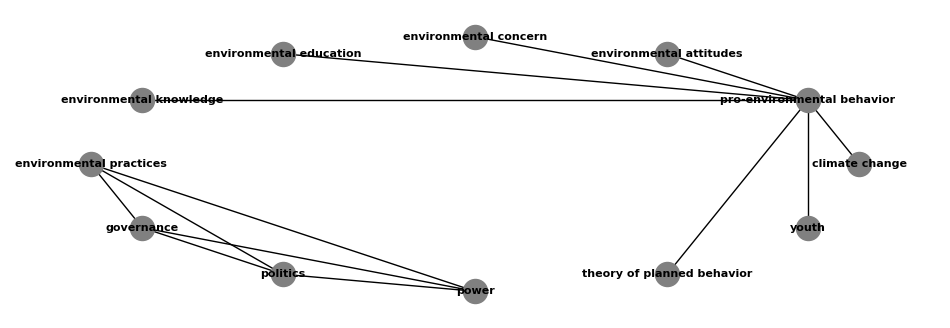

In [215]:
## 37 ## Building a network for sub-question 1 and sub-question 2
fig, ax = plt.subplots(figsize = (12, 4))

net_q1_q2 = nx.from_pandas_edgelist(rules
                                    , source = "antecedents"
                                    , target = "consequents")

pos = nx.circular_layout(net_q1_q2)

nx.draw(net_q1_q2
        , pos = pos
        , font_size = 8
        , font_weight = "bold"
        , node_color = "grey"
        , with_labels = True)

plt.show()

In [148]:
## 38 ## Displaying the top 20 most frequently encountered keywords
df_keyword_counts_sorted.head(20)

,Keyword,Count
0,pro-environmental behavior,144
1,environmental behavior,56
2,sustainability,43
3,climate change,38
4,environmental education,33
5,environmental practice,27
6,environmental concern,27
7,environmental attitude,27
8,environment,22
9,theory of planned behavior,17


### 5_2_Visualization_for_sub-question_3

In [196]:
## 39 ## Building a chart for sub-question 3
color_mapq3 = {"Q1": "#C0C0C0"
               , "Q2": "#696969"
               , "Q3": "grey"
               , "Q4": "#303030"}

fig_q3 = px.histogram(new_data_raw_fin
                      , x = "Direction"
                      , template = "simple_white"
                      , color = "SJR best quartile"
                      , color_discrete_map = color_mapq3)

fig_q3.update_layout(yaxis_title = "Fraction"
                     , xaxis_title = "Direction"
                     , title = {"font": dict(size = 15)
                                , "x": 0.5}
                     , barnorm = "fraction"
                     , legend_title = "SJR quartile")

fig_q3.update_traces(hovertemplate = "Direction: %{x} <br>Fraction: %{y}")

fig_q3.show()

/Applications/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Applications/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### 5_3_Visualization_for_sub-question_4

In [190]:
## 40 ## Building a chart for sub-question 4
color_mapq4 = {"conceptual": "#808080"
               , "methodological": "#303030"
               , "both": "#C0C0C0"}

fig_q4 = px.histogram(new_data_raw_fin
                      , x = "Affiliation country"
                      , template = "simple_white"
                      , color = "Direction"
                      , color_discrete_map = color_mapq4)

fig_q4.update_layout(yaxis_title = "Fraction"
                     , xaxis_title = ""
                     , title = {"font": dict(size = 15)
                                , "x": 0.5}
                     , barnorm = "fraction"
                     , legend_title = "Type of publication")

fig_q4.update_xaxes(tickangle = 270)

fig_q4.update_traces(hovertemplate = "Country: %{x} <br>Fraction: %{y}")

fig_q4.show()

/Applications/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Applications/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

